In [1]:
import os
import time
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sys, time, os, warnings
import numpy as np
import pandas as pd
from collections import Counter 
from tensorflow.keras.preprocessing.image import load_img
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")

In [2]:

Flickr_text_dir = "/content/drive/MyDrive/image-caption-generator-master/data/Flickr8k_text/Flickr8k.token.txt"
Flickr_jpg_dir = "/content/drive/MyDrive/image-caption-generator-master/data/Flicker8k_Dataset"
jpgs = os.listdir(Flickr_jpg_dir)  # os.listdir(path) returns list containing names of entries in directory given by path.
print("Number of .jpg flies in Flicker8k Dataset: {}".format(len(jpgs)))

Number of .jpg flies in Flicker8k Dataset: 8091


In [3]:
def load_csv(directory):
    desc = dict()
    text = pd.read_csv(directory, delimiter = '|', header = None, names = ["filename","index","caption"])
    text = text.iloc[1:,:]
    df_new = text[text.iloc[:,2].notnull()]
    print(df_new.iloc[:5,:])
    return df_new

In [4]:
file = open(Flickr_text_dir,'r') # Opening File
text = file.read() # Reading File
file.close() # Closing File
datatxt = []
for line in text.split('\n'): # Loop runs for No. of Images present
    col = line.split('\t') # Splits into 2 tuples on basis of '\t'
    if len(col) == 1:
        continue
    w = col[0].split("#") # Splits 1st tuple on basis of '#'
    datatxt.append(w + [col[1].lower()])
df_txt_flickr = pd.DataFrame(datatxt,columns=["filename","index","caption"])
uni_filenames = np.unique(df_txt_flickr.filename.values)  # uni_filenames stores unique file name e.g. '1000268201_693b08cb0e.jpg'
print("Total no. of Unique File Names: {}".format(len(uni_filenames)))

Total no. of Unique File Names: 8092


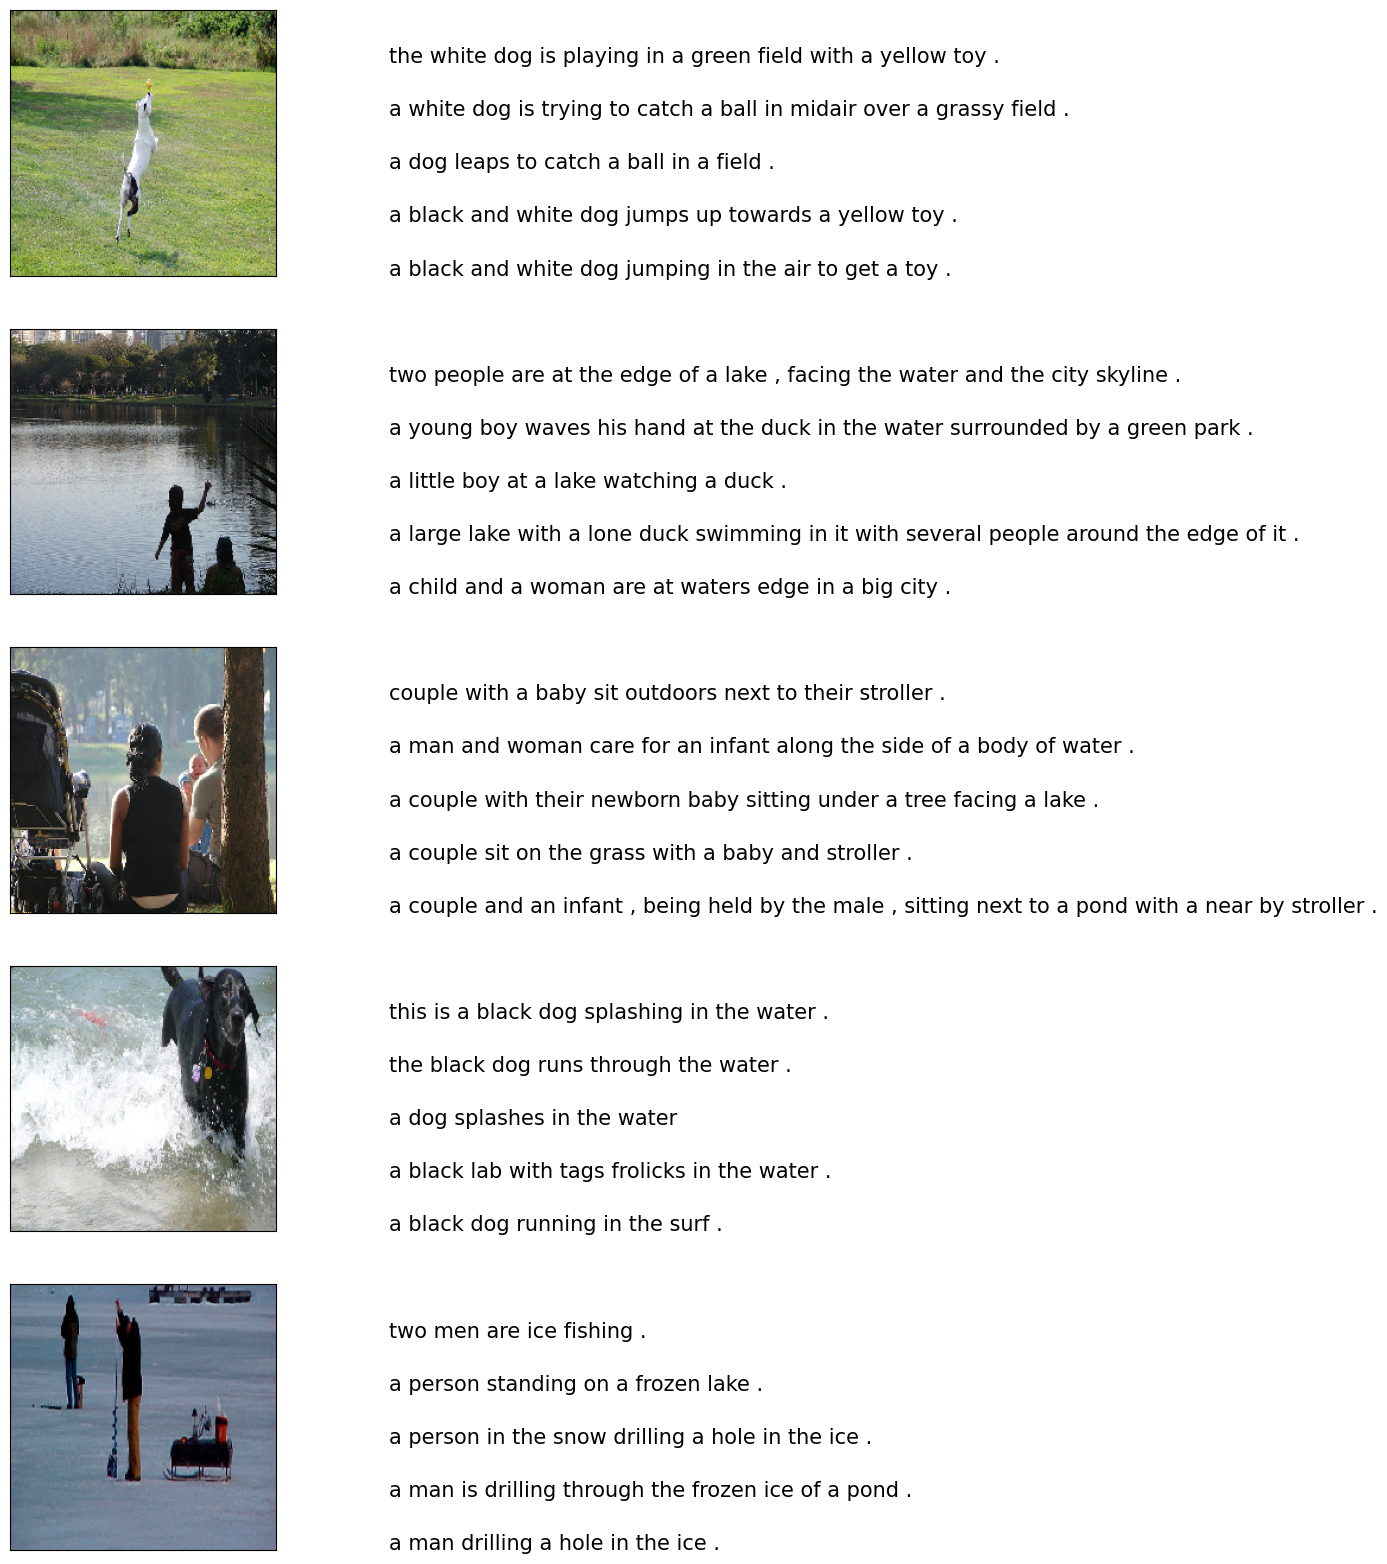

In [5]:

npic = 5  # No. of Pictures
npix = 224  # No. of Pixels
target_size = (npix, npix, 3)  # Target Size of Image (224, 224, 3)
count = 1
fig = plt.figure(figsize=(10,20))  # To Plot the Image
for jpgfnm in uni_filenames[15:15+npic]:  # Taking random 5 images of Dataset
    filename = Flickr_jpg_dir + '/' + jpgfnm  # Constructing file name
    captions = list(df_txt_flickr["caption"].loc[df_txt_flickr["filename"]==jpgfnm].values)  # Finding Captions where filename matches 'jpgfnm'
    image_load = load_img(filename, target_size=target_size)  # Loads image with size as target_size
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load) # To print the Image
    count += 1
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off') # To put the axis 'off'
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)
    count += 1
plt.show()

In [6]:
def df_word(df_txt_flickr):
    vocabulary = []  # Declared an empty list vocabulary 
    for i in range(len(df_txt_flickr)):
        temp = df_txt_flickr.iloc[i,2]  #.iloc[] is from 0 to length-1 & [ ,2] is selcted for 'caption'
        vocabulary.extend(temp.split())
    print('Total Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt_flickr)
dfword.head(10)  # Returns top 5 Rows of dfword 

Total Vocabulary Size: 8918


,word,count
0,a,62989
1,.,36581
2,in,18975
3,the,18419
4,on,10744
5,is,9345
6,and,8852
7,dog,8136
8,with,7765
9,man,7266


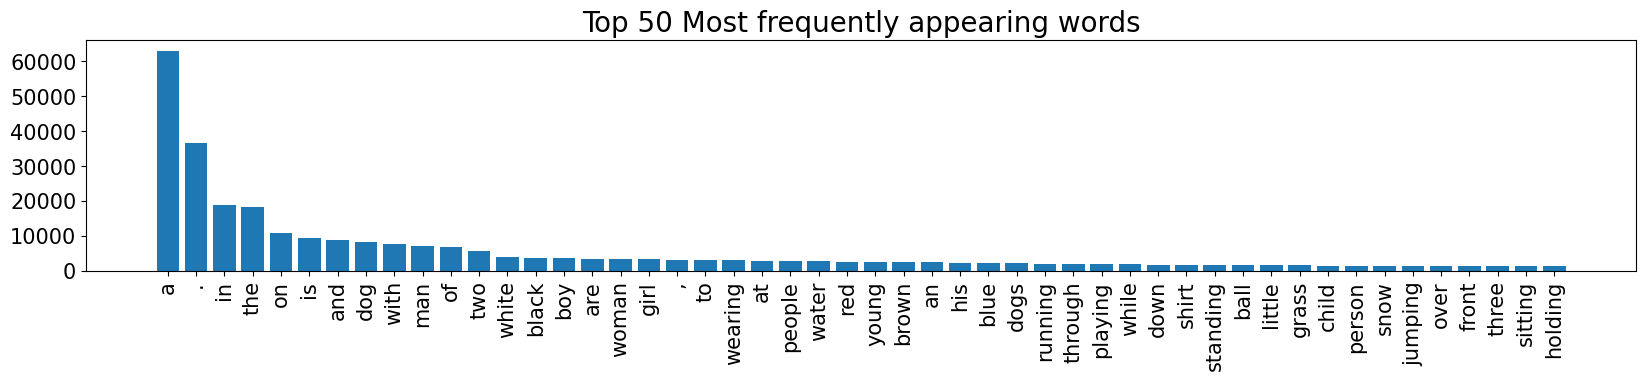

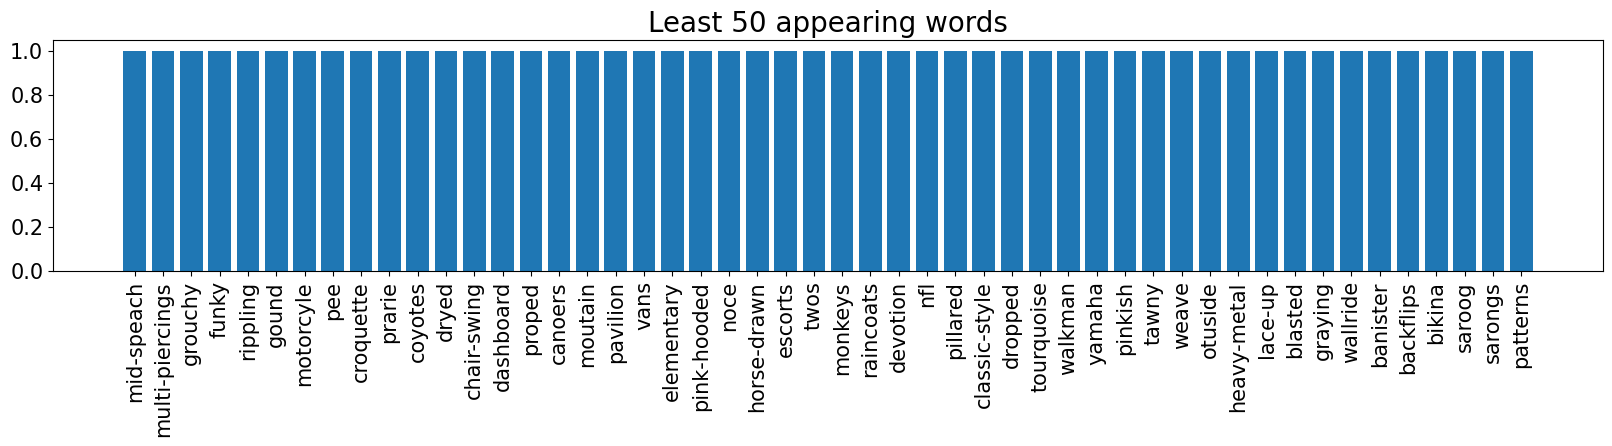

In [7]:
topn = 50  # Taking top 50 words
def plthist(dfsub, title):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=15)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=15)
    plt.title(title,fontsize=20)
    plt.show()
plthist(dfword.iloc[:topn,:],title="Top 50 Most frequently appearing words")
plthist(dfword.iloc[-topn:,:],title="Least 50 appearing words")

In [8]:
import string
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)

In [9]:
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

In [10]:
def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

In [11]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)
for i, caption in enumerate(df_txt_flickr.caption.values): 
    # enumerate() Adds a counter to an iterable & returns it as enumerate object
    newcaption = text_clean(caption)
    if(i<10): # Printing the first 10 Captions for example
        print(newcaption)
    df_txt_flickr["caption"].iloc[i] = newcaption

 child in pink dress is climbing up set of stairs in an entry way
 girl going into wooden building
 little girl climbing into wooden playhouse
 little girl climbing the stairs to her playhouse
 little girl in pink dress going into wooden cabin
 black dog and spotted dog are fighting
 black dog and tricolored dog playing with each other on the road
 black dog and white dog with brown spots are staring at each other in the street
 two dogs of different breeds looking at each other on the road
 two dogs on pavement moving toward each other


Total Vocabulary Size: 8763


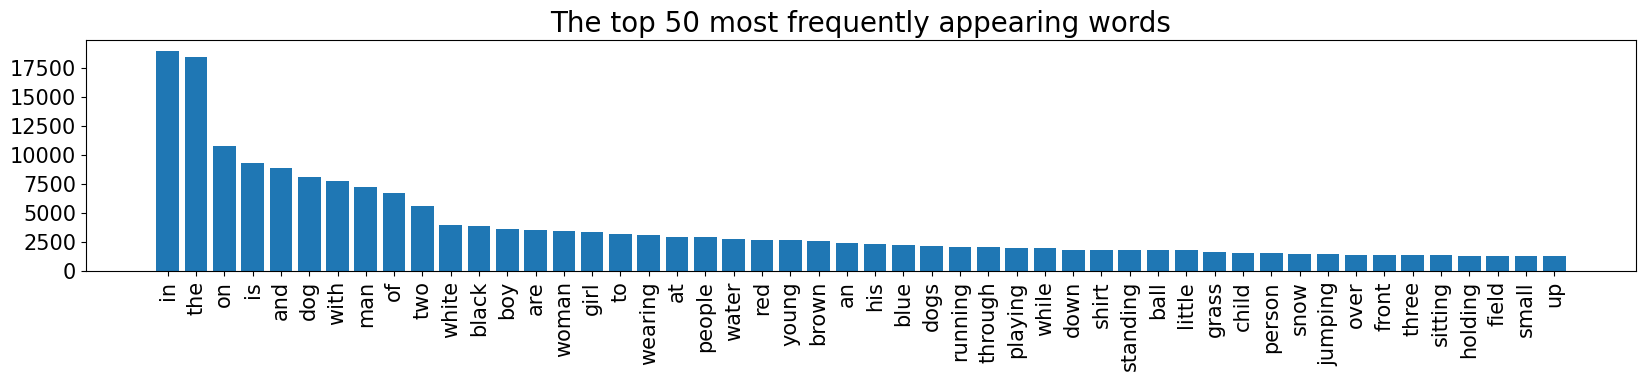

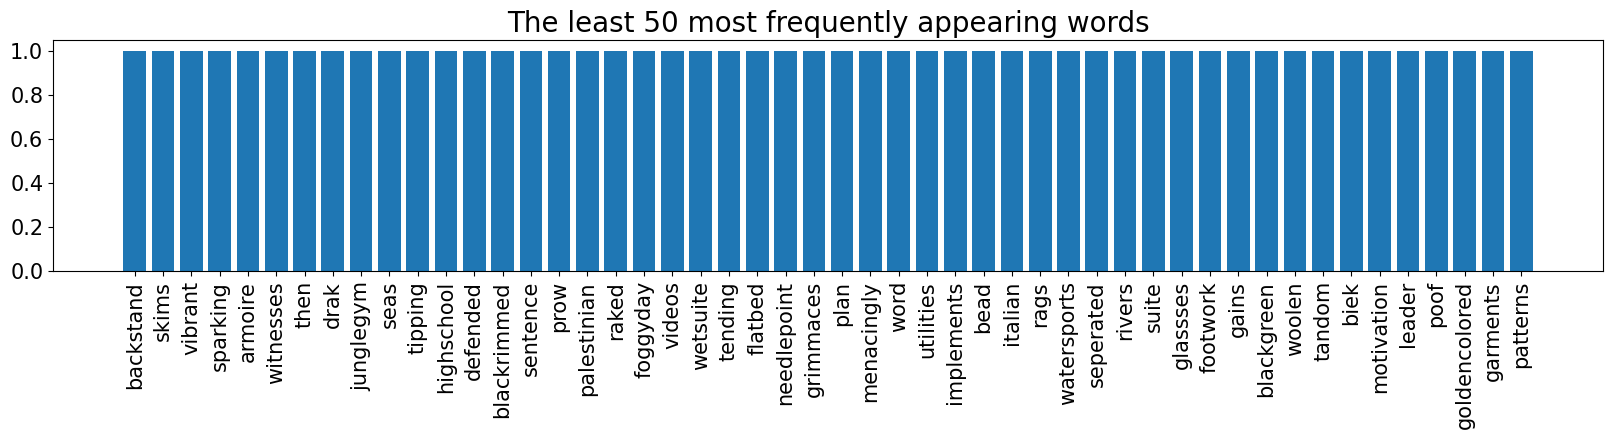

In [12]:
dfword = df_word(df_txt_flickr)
plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

In [13]:
from copy import copy
def add_start_end_seq_token(captions):
    caps = []
    for txt in captions:
        txt = 'startseq ' + txt + ' endseq'  # Adding <startseq> and <endseq> to all captions
        caps.append(txt)
    return(caps)
df_txt_flickr0 = copy(df_txt_flickr)
df_txt_flickr0["caption"] = add_start_end_seq_token(df_txt_flickr["caption"])
df_txt_flickr0.head(5)
del df_txt_flickr

In [14]:
from keras.applications import VGG16
from keras.utils.data_utils import get_file

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')

modelvgg = VGG16(include_top=True, weights=weights_path)
modelvgg.summary()



553467096/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [15]:
from keras import models
modelvgg.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output) # Removing Last Layer of VGG-16 Pretrained Net
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict

images = OrderedDict()  # To preserve the Order of Dictionary Keys
npix = 224  # No. of Pixels 
target_size = (npix,npix,3)  # Target Size of the Image
for i,name in enumerate(jpgs):
    filename = Flickr_jpg_dir + '/' + name  # Load an image from file
    image = load_img(filename, target_size=target_size)
    image = img_to_array(image)  # Convert the image pixels to a Numpy Array
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3])) 
    images[name] = y_pred.flatten()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input



dimages, keepindex = [],[]
nd=(df_txt_flickr0["index"].values)
b = [(int(i)==0) for i in nd]
df_txt_flickr0 = df_txt_flickr0.loc[df_txt_flickr0["index"].values == "0",: ]

for i, fnm in enumerate(df_txt_flickr0.filename):  # enumerate() adds a counter to an iterable & returns an enumerate object
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames = df_txt_flickr0["filename"].iloc[keepindex].values
dcaptions = df_txt_flickr0["caption"].iloc[keepindex].values
dimages = np.array(dimages)
print(df_txt_flickr0["index"][:5])

0     0
5     0
10    0
15    0
20    0
Name: index, dtype: object


In [20]:
from keras.preprocessing.text import Tokenizer
count_words=22000  # Maximum no. of words in dictionary 
# nb_words = 31782
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

vocabulary size : 4476
[[1, 38, 3, 66, 144, 7, 124, 52, 406, 9, 367, 3, 24, 2351, 522, 2], [1, 12, 8, 5, 752, 8, 17, 368, 2], [1, 48, 15, 170, 3, 584, 101, 3, 41, 9, 551, 1198, 11, 55, 213, 3, 1076, 2], [1, 10, 621, 6, 150, 27, 23, 8, 101, 46, 112, 2], [1, 10, 3, 24, 82, 96, 1199, 19, 162, 2]]


In [21]:
prop_test, prop_val = 0.2, 0.2 
N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)
def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest], dtexts[Ntest:Ntest+Nval],dtexts[Ntest+Nval:])
dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [22]:
maxlen = np.max([len(text) for text in dtexts])
print(maxlen)

30


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))
    assert(N==len(dimages))
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)
            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)
Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)

# captions/images = 4855
 (49631, 30) (49631, 4096) (49631, 4476)
# captions/images = 1618
 (16353, 30) (16353, 4096) (16353, 4476)


In [24]:
from keras import layers
from keras import regularizers

print(vocab_size)  # Image feature

dim_embedding = 128  # Increase embedding dimension
input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(512, activation='relu', name="ImageFeature")(input_image)  # Increase number of units

# Sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size, dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(512, name="CaptionFeature")(ftxt)  # Increase number of units

# Combined Model for Decoder
decoder = layers.add([ftxt, fimage])
decoder = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(decoder)  # Add L2 regularization
decoder = layers.Dropout(0.5)(decoder)  # Add dropout layer
output = layers.Dense(vocab_size, activation='softmax')(decoder)
model = models.Model(inputs=[input_image, input_txt], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam')
print(model.summary())




4476
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 128)      572928      ['input_3[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 CaptionFeature (LSTM)          (None, 512)          1312768     ['embedding[0][0]']              
                                                                                       

In [25]:
start = time.time()
hist = model.fit([Ximage_train, Xtext_train], ytext_train, epochs=7, verbose=2, batch_size=64, validation_data=([Ximage_val, Xtext_val], ytext_val))
end = time.time()
print("Run Time {:3.2f}MIN".format((end - start )/60))
print(Ximage_train.shape,Xtext_train.shape,ytext_train.shape)

Epoch 1/7
776/776 - 78s - loss: 5.6959 - val_loss: 4.9480 - 78s/epoch - 100ms/step
Epoch 2/7
776/776 - 57s - loss: 4.7679 - val_loss: 4.5809 - 57s/epoch - 74ms/step
Epoch 3/7
776/776 - 56s - loss: 4.3955 - val_loss: 4.4334 - 56s/epoch - 73ms/step
Epoch 4/7
776/776 - 57s - loss: 4.1874 - val_loss: 4.3768 - 57s/epoch - 73ms/step
Epoch 5/7
776/776 - 57s - loss: 4.0170 - val_loss: 4.3472 - 57s/epoch - 73ms/step
Epoch 6/7
776/776 - 56s - loss: 3.8733 - val_loss: 4.3465 - 56s/epoch - 72ms/step
Epoch 7/7
776/776 - 55s - loss: 3.7472 - val_loss: 4.3722 - 55s/epoch - 71ms/step
Run Time 6.98MIN
(49631, 4096) (49631, 30) (49631, 4476)


Plotting Loss & Validation Loss:


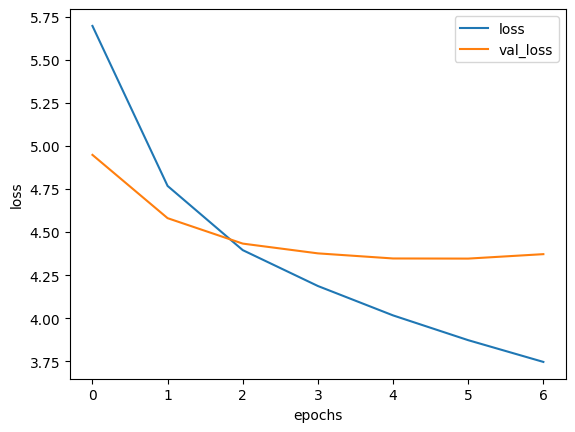

In [26]:
print('Plotting Loss & Validation Loss:')
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

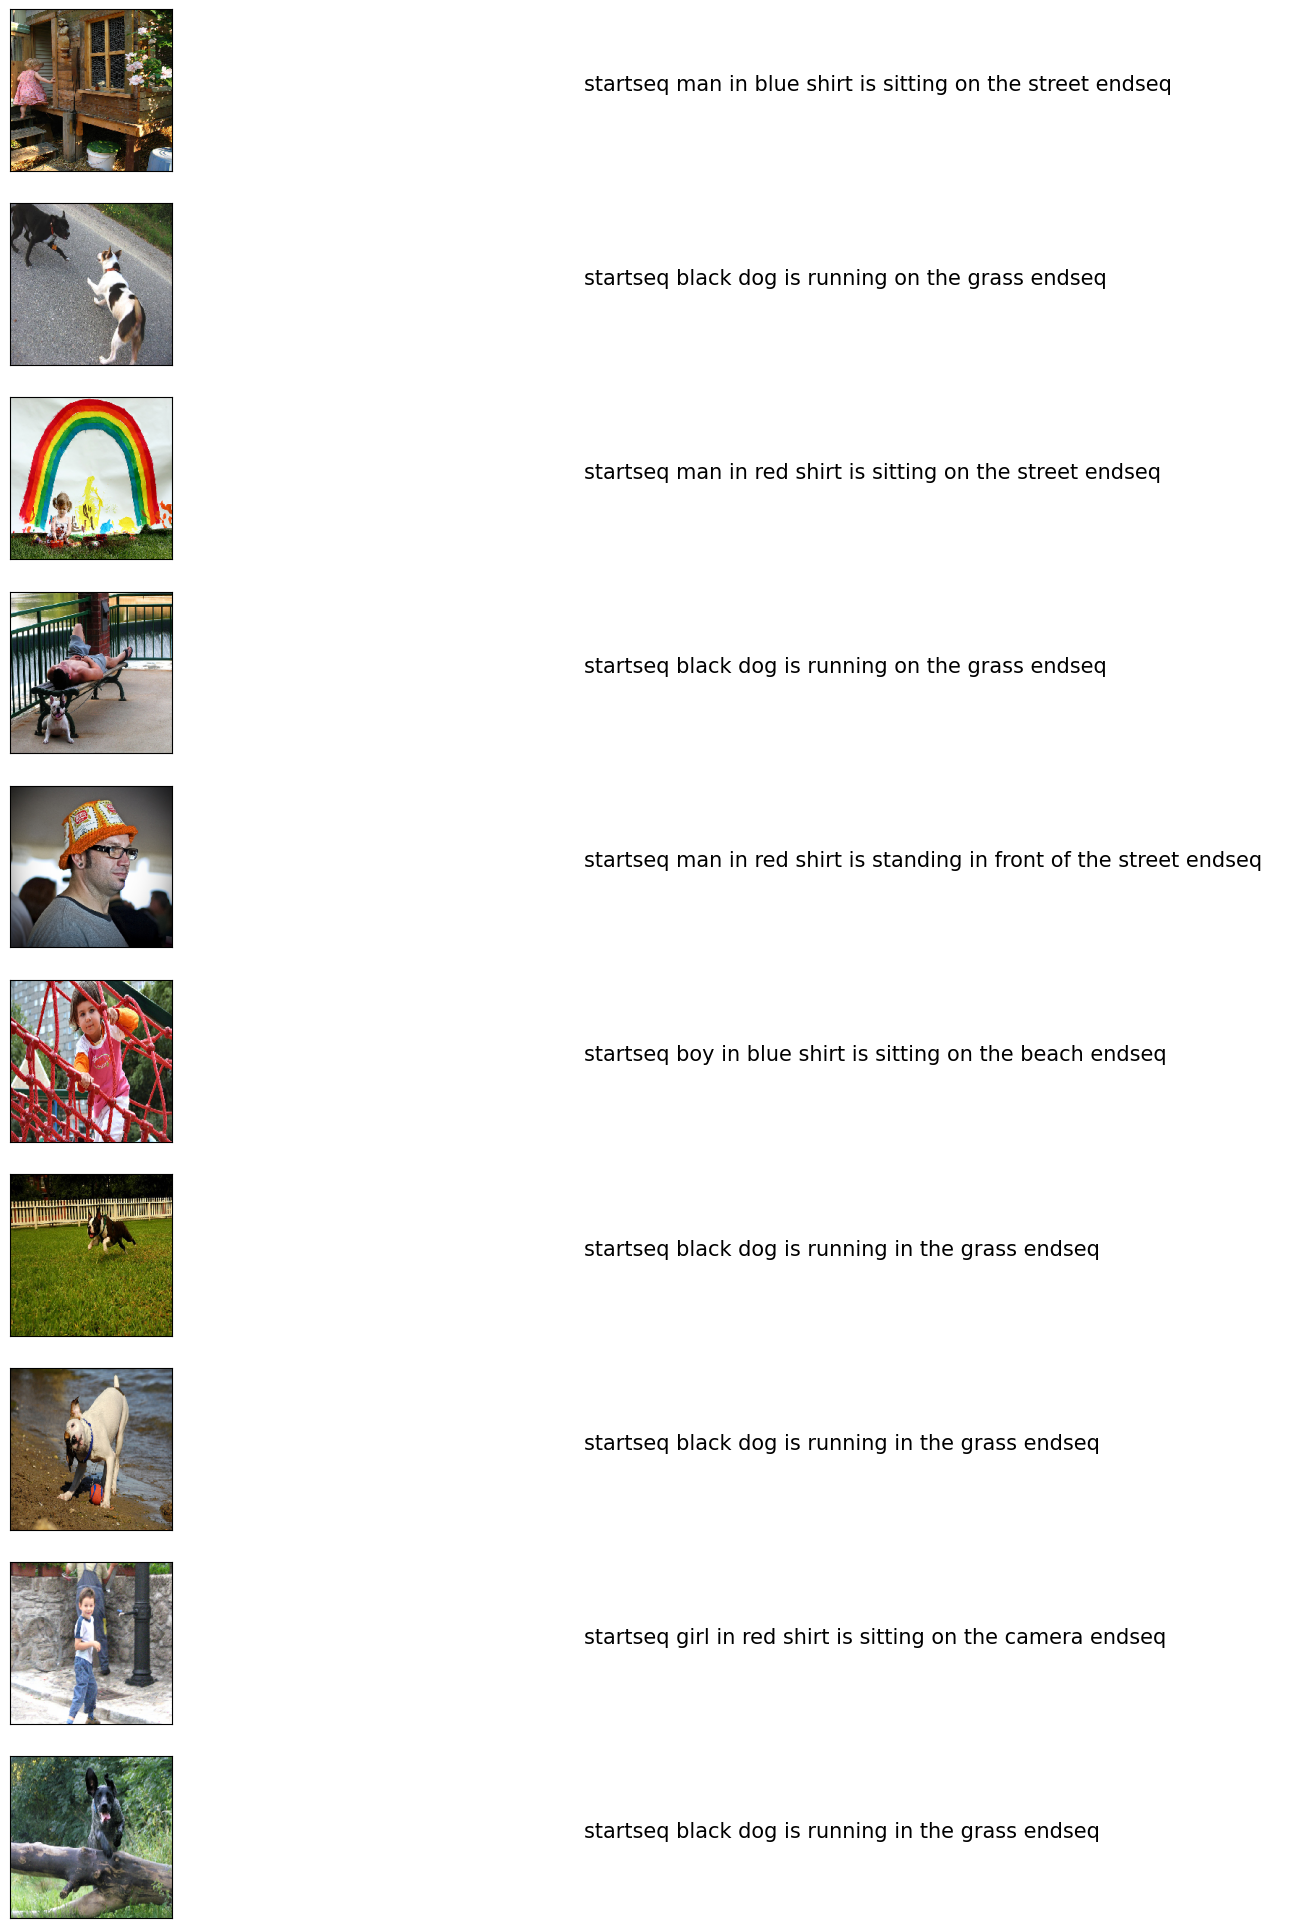

In [27]:

index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])

def predict_caption(image):
    '''
    image.shape = (1, 4462)
    '''

    in_text = 'startseq'
    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return in_text

npic = 0  # Set starting index to 0
npix = 224
target_size = (npix, npix, 3)
count = 1
fig = plt.figure(figsize=(20, 50))
for jpgfnm, image_feature in zip(fnm_test[npic:npic+10], di_test[npic:npic+10]):
    
    filename = Flickr_jpg_dir + '/' + jpgfnm  # Images
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(20, 2, count, xticks=[], yticks=[])
    ax.imshow(image_load)
    count += 1

    caption = predict_caption(image_feature.reshape(1, len(image_feature)))  # Captions
    ax = fig.add_subplot(20, 2, count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.text(0, 0.5, caption, fontsize=15)
    count += 1


plt.show()

In [28]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
nkeep = 5
pred_good, pred_bad, bleus = [], [], [] 
count = 0 
for jpgfnm, image_feature, tokenized_text in zip(fnm_test, di_test, dt_test):
    count += 1
    if count % 200 == 0:
        print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
    caption_true = [ index_word[i] for i in tokenized_text ]     
    caption_true = caption_true[1:-1] # Removing startreg & endreg
    
    # Captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1] # Removing startreg & endreg
    
    # Calculate BLEU scores
    smoothing = SmoothingFunction().method1  # Choose smoothing method
    bleu1 = sentence_bleu([caption_true], caption, weights=(1, 0, 0, 0), smoothing_function=smoothing)
    bleu2 = sentence_bleu([caption_true], caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
    bleu3 = sentence_bleu([caption_true], caption, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothing)
    bleu4 = sentence_bleu([caption_true], caption, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothing)
    
    bleus.append((bleu1, bleu2, bleu3, bleu4))
    
    # Store good and bad predictions
    if bleu4 > 0.7 and len(pred_good) < nkeep:
        pred_good.append((bleu4, jpgfnm, caption_true, caption))
    elif bleu4 < 0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu4, jpgfnm, caption_true, caption))

# Calculate mean BLEU scores for the test set
bleus = np.array(bleus)
mean_bleu1 = np.mean(bleus[:, 0])
mean_bleu2 = np.mean(bleus[:, 1])
mean_bleu3 = np.mean(bleus[:, 2])
mean_bleu4 = np.mean(bleus[:, 3])
print("The Mean BLEU-1 Score for the Test Set is {:4.3f}".format(mean_bleu1))
print("The Mean BLEU-2 Score for the Test Set is {:4.3f}".format(mean_bleu2))
print("The Mean BLEU-3 Score for the Test Set is {:4.3f}".format(mean_bleu3))
print("The Mean BLEU-4 Score for the Test Set is {:4.3f}".format(mean_bleu4))


  12.36% is done..
  24.72% is done..
  37.08% is done..
  49.44% is done..
  61.80% is done..
  74.17% is done..
  86.53% is done..
  98.89% is done..
The Mean BLEU-1 Score for the Test Set is 0.180
The Mean BLEU-2 Score for the Test Set is 0.086
The Mean BLEU-3 Score for the Test Set is 0.052
The Mean BLEU-4 Score for the Test Set is 0.037


Captions corresponding to High-BLEU Score


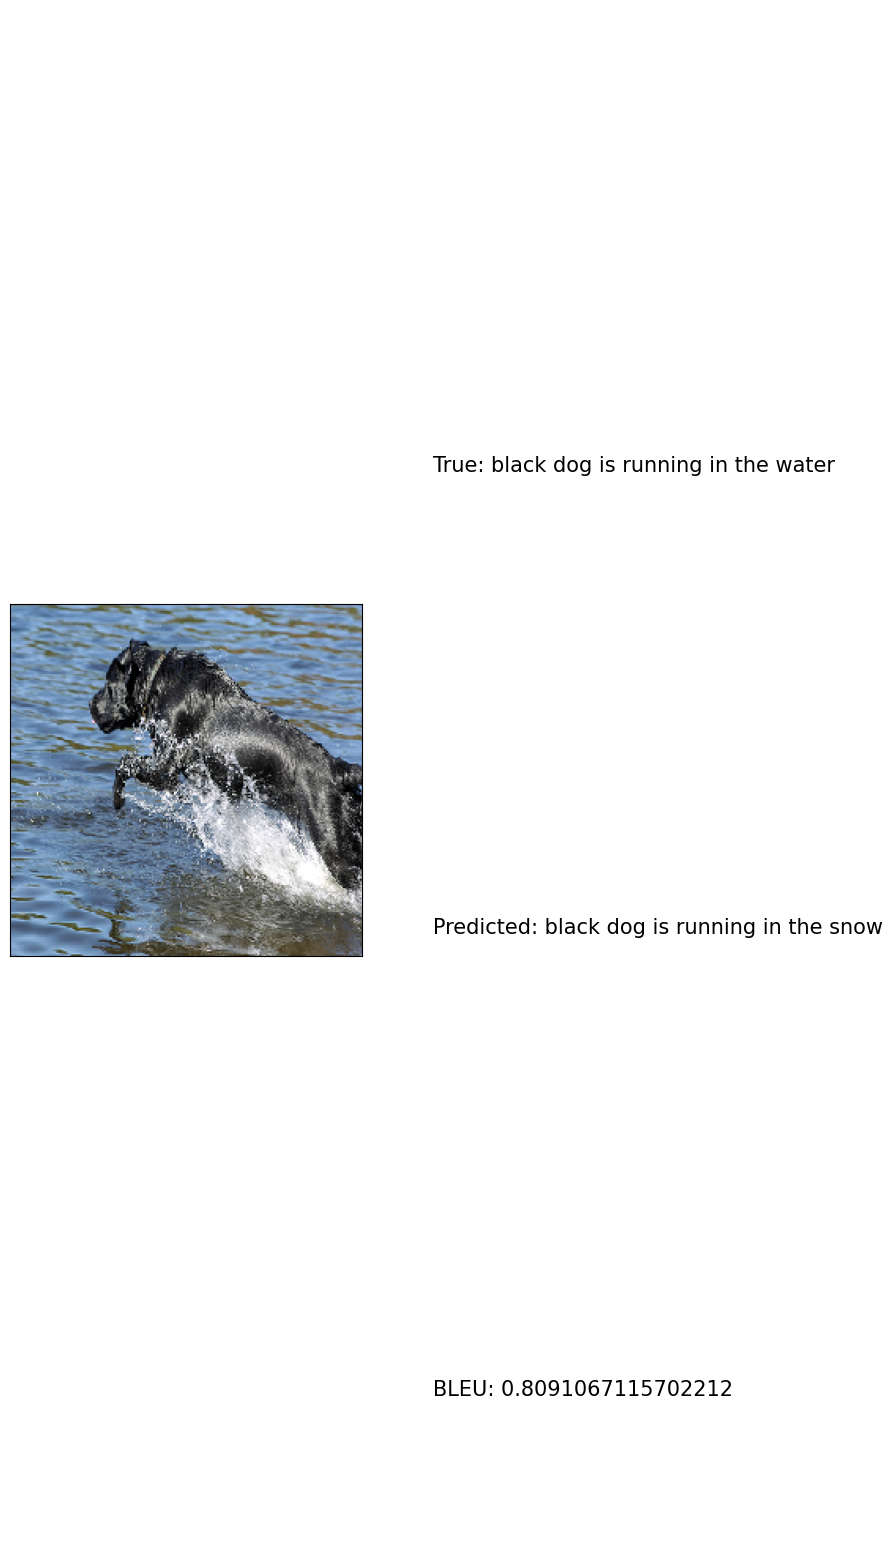

In [33]:
def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)    
    count = 1
    
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
        filename = Flickr_jpg_dir + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1
        caption_true = create_str(caption_true)
        caption = create_str(caption)
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"True:" + caption_true,fontsize=15)
        ax.text(0,0.4,"Predicted:" + caption,fontsize=15)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=15)
        count += 1
    plt.show()


print("Captions corresponding to High-BLEU Score")
plot_images(pred_good)